1️⃣ Cargar los datos y revisar las primeras filas

In [2]:
!conda info --envs

# conda environments:
#
base                     C:\Users\maria\anaconda3
Diabetes              *  C:\Users\maria\anaconda3\envs\Diabetes
curso_datahack           C:\Users\maria\anaconda3\envs\curso_datahack
ensembles_environment     C:\Users\maria\anaconda3\envs\ensembles_environment
entorno_alternativo      C:\Users\maria\anaconda3\envs\entorno_alternativo
myenv                    C:\Users\maria\anaconda3\envs\myenv
myenv38                  C:\Users\maria\anaconda3\envs\myenv38
visualizacion            C:\Users\maria\anaconda3\envs\visualizacion
visualizacionn           C:\Users\maria\anaconda3\envs\visualizacionn
                         C:\Users\maria\miniconda3
                         C:\Users\maria\miniconda3\envs\envnubewiki
                         C:\Users\maria\miniconda3\envs\myenv
                         C:\Users\maria\miniconda3\envs\nube_wiki



In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix

In [4]:
df = pd.read_csv(r"C:\Users\maria\Desktop\diabetesnodiabetes\diabetes_data_upload.csv")

In [5]:
df

,Age,Gender,Polyuria,Polydipsia,sudden weight loss,weakness,Polyphagia,Genital thrush,visual blurring,Itching,Irritability,delayed healing,partial paresis,muscle stiffness,Alopecia,Obesity,class
0,40,Male,No,Yes,No,Yes,No,No,No,Yes,No,Yes,No,Yes,Yes,Yes,Positive
1,58,Male,No,No,No,Yes,No,No,Yes,No,No,No,Yes,No,Yes,No,Positive
2,41,Male,Yes,No,No,Yes,Yes,No,No,Yes,No,Yes,No,Yes,Yes,No,Positive
3,45,Male,No,No,Yes,Yes,Yes,Yes,No,Yes,No,Yes,No,No,No,No,Positive
4,60,Male,Yes,Yes,Yes,Yes,Yes,No,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Positive
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
515,39,Female,Yes,Yes,Yes,No,Yes,No,No,Yes,No,Yes,Yes,No,No,No,Positive
516,48,Female,Yes,Yes,Yes,Yes,Yes,No,No,Yes,Yes,Yes,Yes,No,No,No,Positive
517,58,Female,Yes,Yes,Yes,Yes,Yes,No,Yes,No,No,No,Yes,Yes,No,Yes,Positive
518,32,Female,No,No,No,Yes,No,No,Yes,Yes,No,Yes,No,No,Yes,No,Negative


In [6]:
df.head()

,Age,Gender,Polyuria,Polydipsia,sudden weight loss,weakness,Polyphagia,Genital thrush,visual blurring,Itching,Irritability,delayed healing,partial paresis,muscle stiffness,Alopecia,Obesity,class
0,40,Male,No,Yes,No,Yes,No,No,No,Yes,No,Yes,No,Yes,Yes,Yes,Positive
1,58,Male,No,No,No,Yes,No,No,Yes,No,No,No,Yes,No,Yes,No,Positive
2,41,Male,Yes,No,No,Yes,Yes,No,No,Yes,No,Yes,No,Yes,Yes,No,Positive
3,45,Male,No,No,Yes,Yes,Yes,Yes,No,Yes,No,Yes,No,No,No,No,Positive
4,60,Male,Yes,Yes,Yes,Yes,Yes,No,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Positive


2️⃣ Verificar valores nulos y tipos de datos

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 520 entries, 0 to 519
Data columns (total 17 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Age                 520 non-null    int64 
 1   Gender              520 non-null    object
 2   Polyuria            520 non-null    object
 3   Polydipsia          520 non-null    object
 4   sudden weight loss  520 non-null    object
 5   weakness            520 non-null    object
 6   Polyphagia          520 non-null    object
 7   Genital thrush      520 non-null    object
 8   visual blurring     520 non-null    object
 9   Itching             520 non-null    object
 10  Irritability        520 non-null    object
 11  delayed healing     520 non-null    object
 12  partial paresis     520 non-null    object
 13  muscle stiffness    520 non-null    object
 14  Alopecia            520 non-null    object
 15  Obesity             520 non-null    object
 16  class               520 no

In [8]:
df.isnull().sum()

Age                   0
Gender                0
Polyuria              0
Polydipsia            0
sudden weight loss    0
weakness              0
Polyphagia            0
Genital thrush        0
visual blurring       0
Itching               0
Irritability          0
delayed healing       0
partial paresis       0
muscle stiffness      0
Alopecia              0
Obesity               0
class                 0
dtype: int64

In [9]:
# Estadísticas descriptivas de las variables numéricas
print(df['Age'].describe())

count    520.000000
mean      48.028846
std       12.151466
min       16.000000
25%       39.000000
50%       47.500000
75%       57.000000
max       90.000000
Name: Age, dtype: float64


count: 520.0
Indica el número total de observaciones o registros en el conjunto de datos. En este caso, hay 520 registros de edades.

mean: 48.03
Es el promedio de la edad en el conjunto de datos. En promedio, las personas tienen 48.03 años.

std: 12.15
Representa la desviación estándar, que mide cuánto varían las edades con respecto al promedio. En este caso, las edades varían, en promedio, en 12.15 años.

min: 16.0
Es la edad mínima en el conjunto de datos. La persona más joven tiene 16 años.

25%: 39.0
Este es el primer cuartil (Q1), que indica que el 25% de las personas tienen una edad menor o igual a 39 años.

50%: 47.5
Es el mediana de la edad. El 50% de las personas tienen una edad menor o igual a 47.5 años. Es el valor que divide el conjunto de datos en dos mitades.

75%: 57.0
Este es el tercer cuartil (Q3), que indica que el 75% de las personas tienen una edad menor o igual a 57 años.

max: 90.0
Es la edad máxima en el conjunto de datos. La persona más vieja tiene 90 años.

3️⃣ Analizar la distribución de las variables

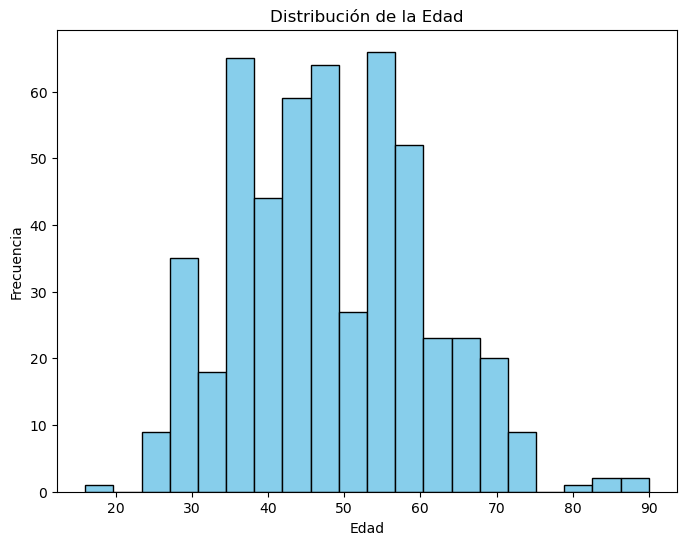

In [10]:
# Visualización con un histograma
plt.figure(figsize=(8, 6))
plt.hist(df['Age'], bins=20, edgecolor='black', color='skyblue')
plt.title('Distribución de la Edad')
plt.xlabel('Edad')
plt.ylabel('Frecuencia')
plt.show()

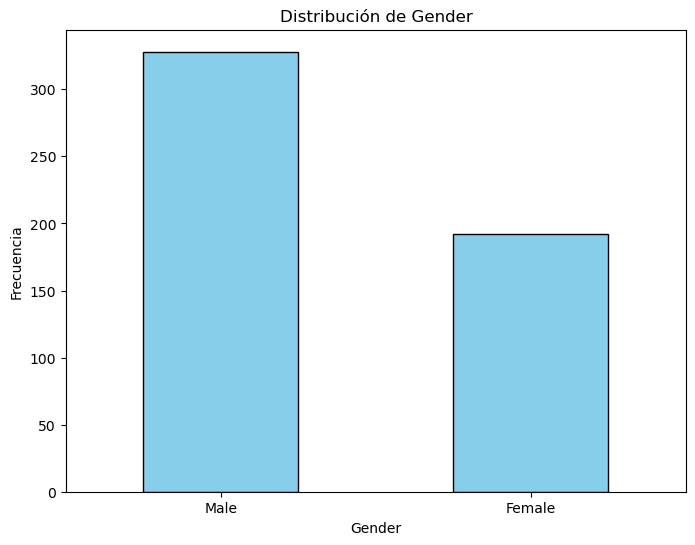

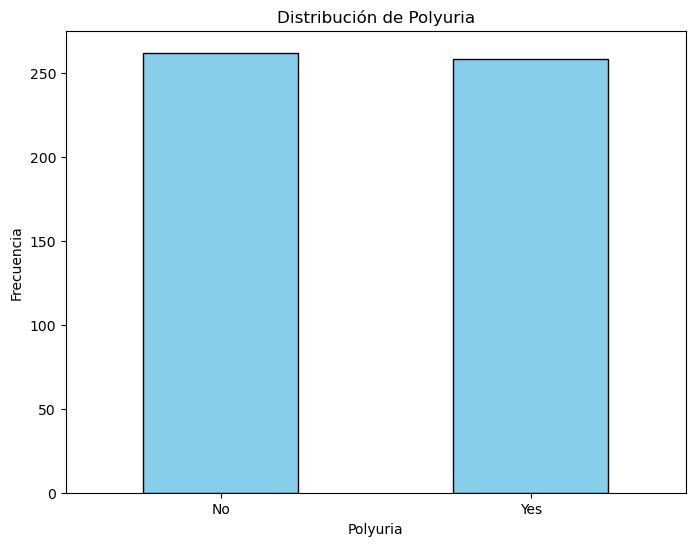

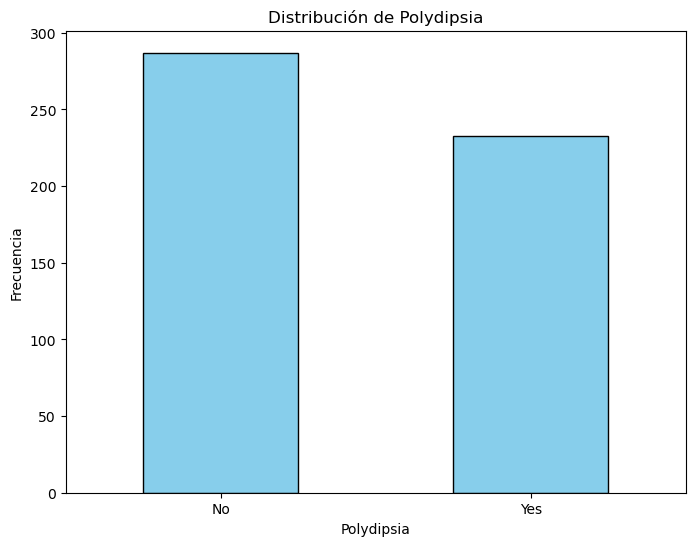

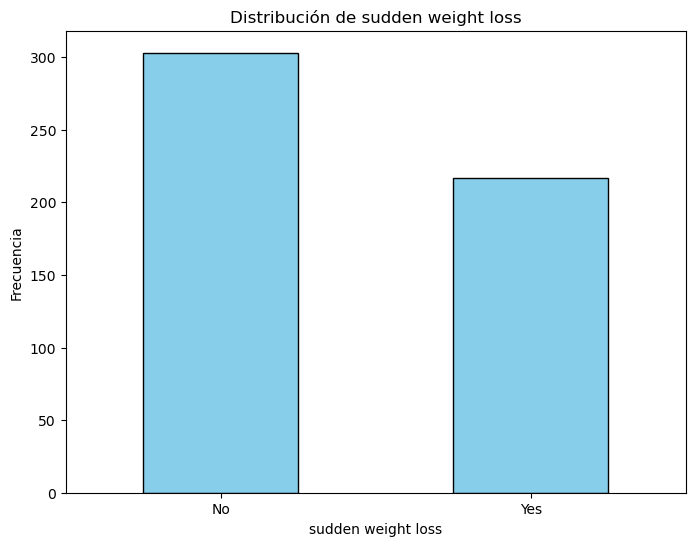

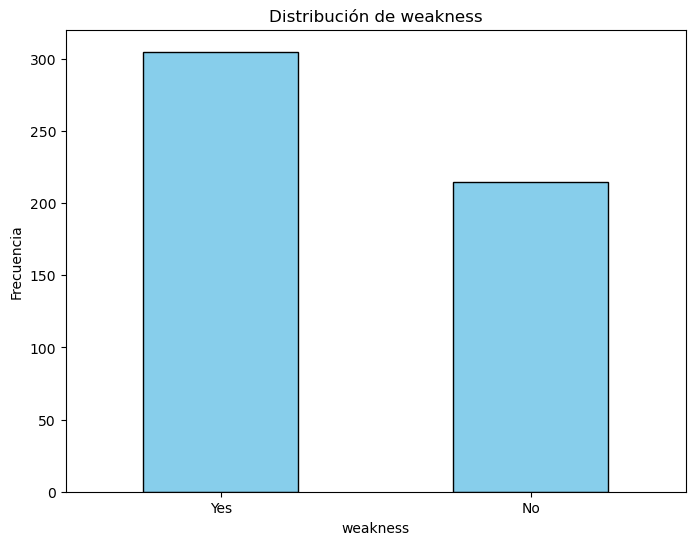

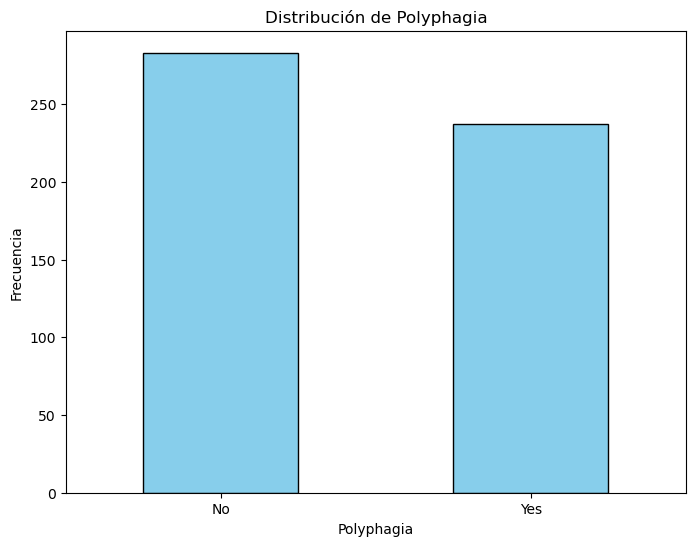

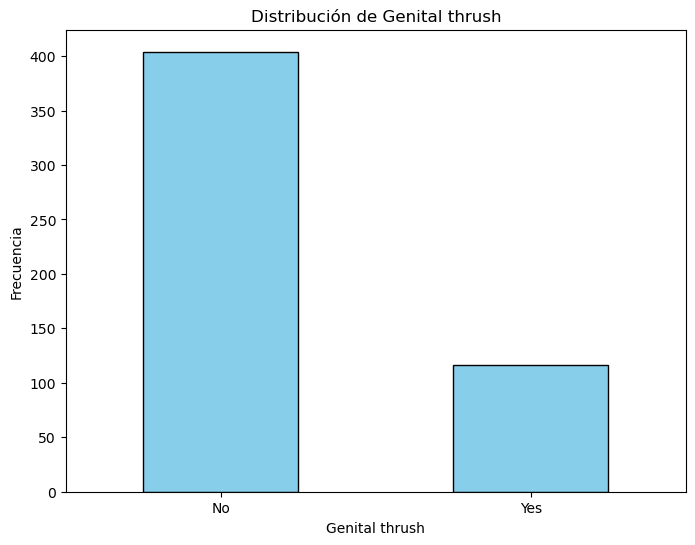

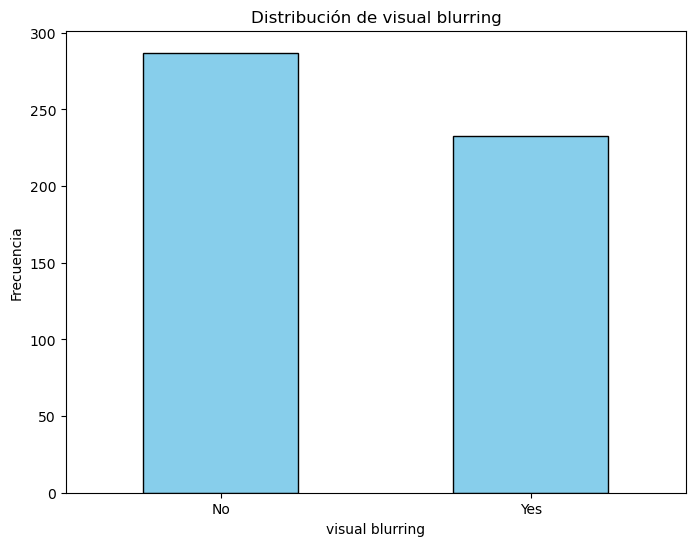

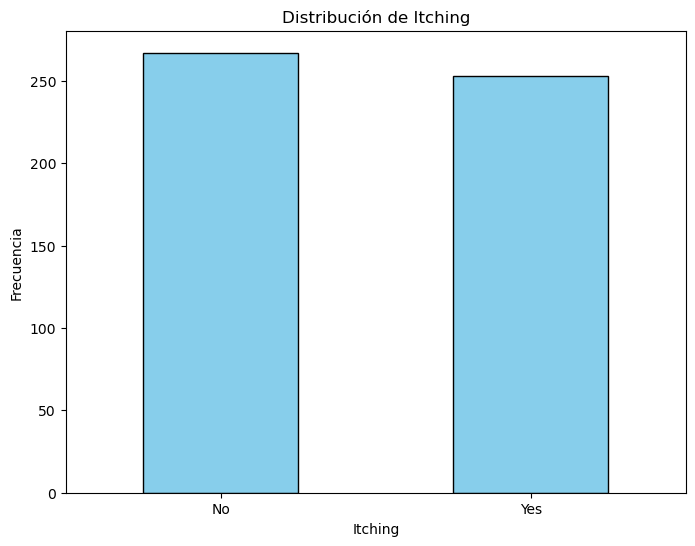

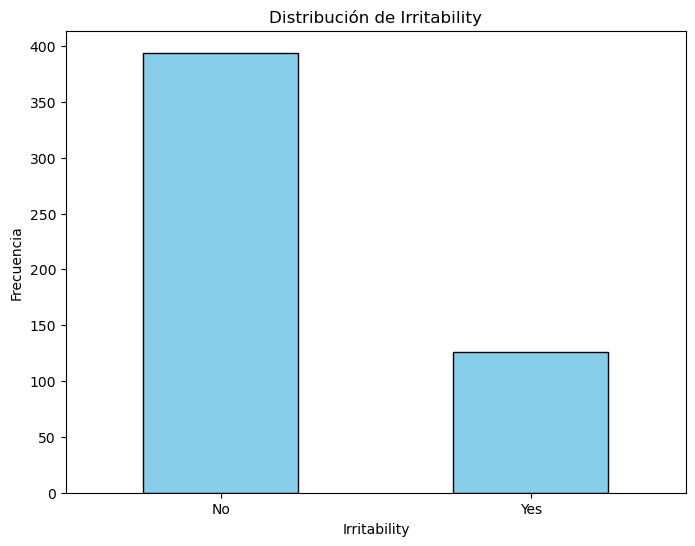

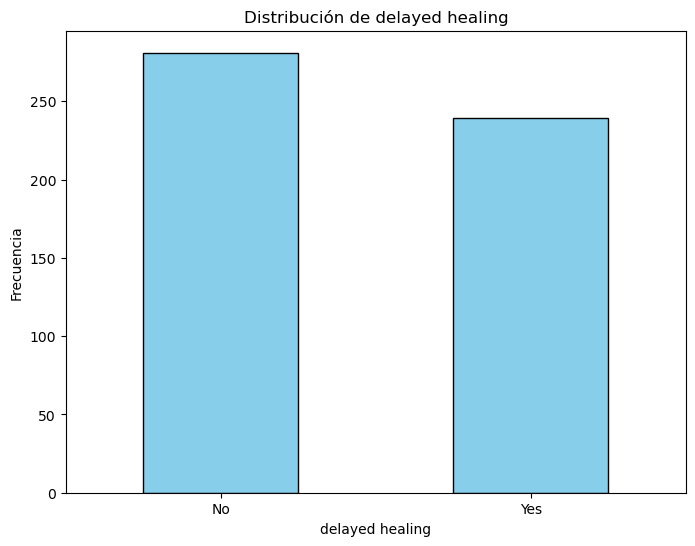

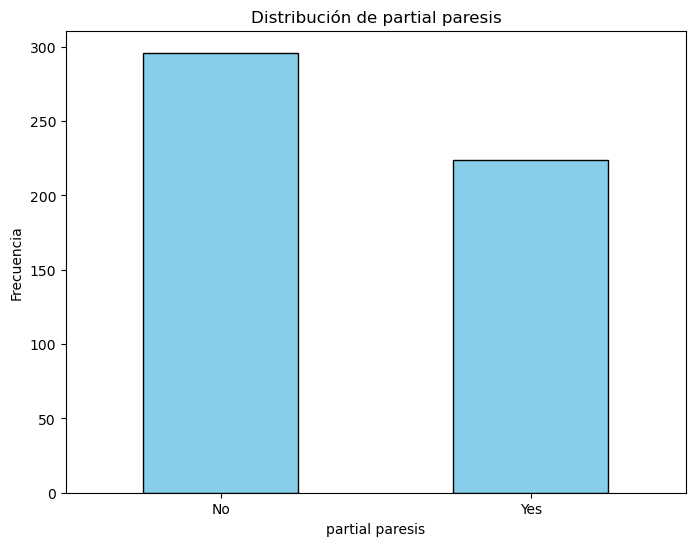

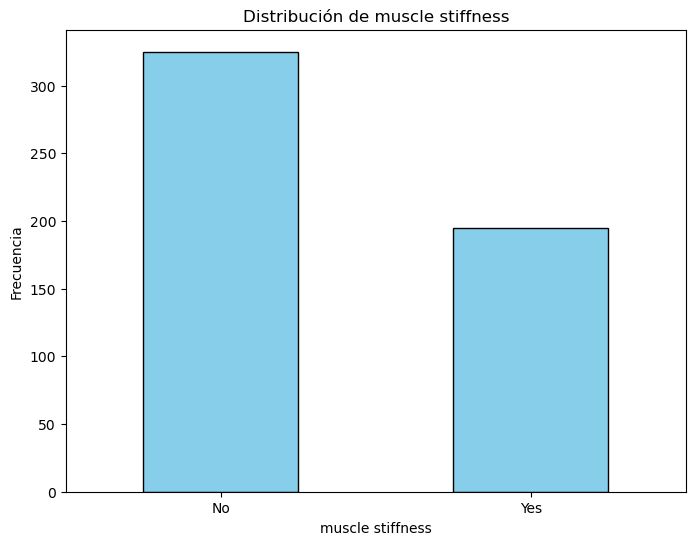

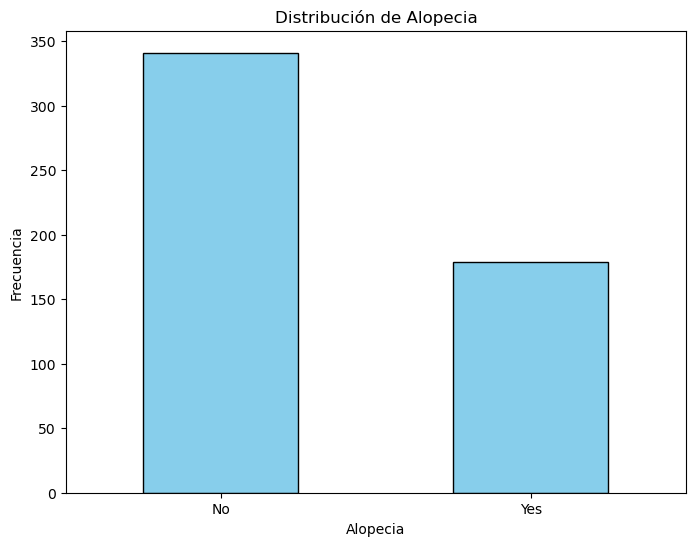

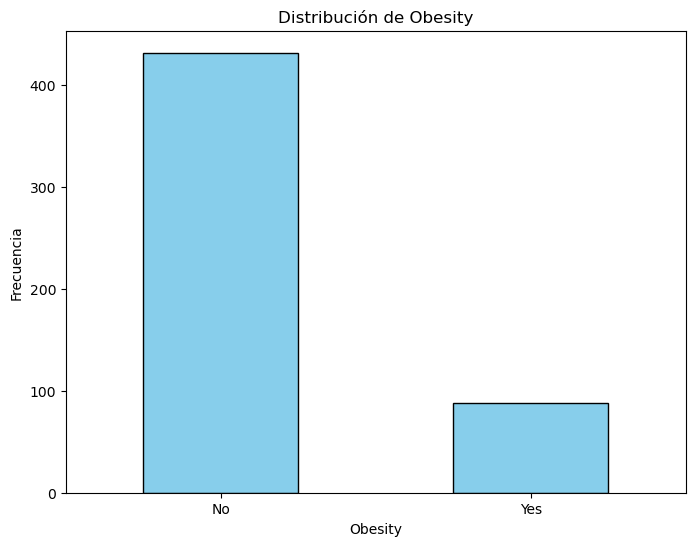

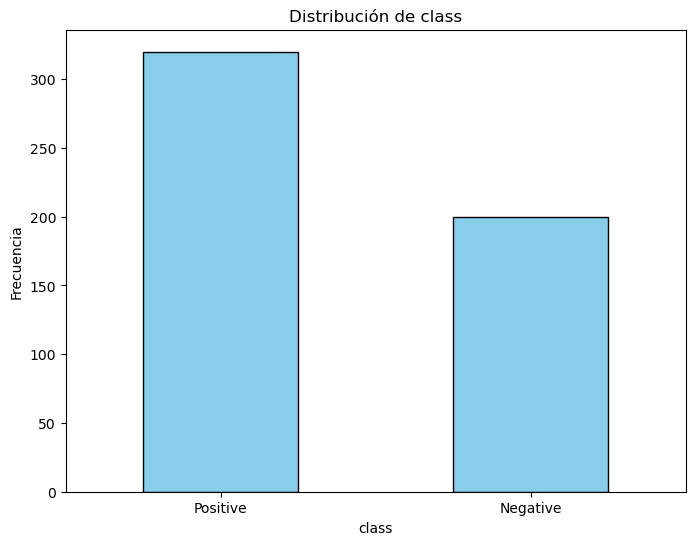

In [11]:
categorical_columns = ['Gender', 'Polyuria', 'Polydipsia', 'sudden weight loss', 'weakness', 
                       'Polyphagia', 'Genital thrush', 'visual blurring', 'Itching', 'Irritability',
                       'delayed healing', 'partial paresis', 'muscle stiffness', 'Alopecia', 'Obesity', 'class']

# Graficar distribución de cada variable categórica
for column in categorical_columns:
    plt.figure(figsize=(8, 6))
    df[column].value_counts().plot(kind='bar', color='skyblue', edgecolor='black')
    plt.title(f'Distribución de {column}')
    plt.xlabel(column)
    plt.ylabel('Frecuencia')
    plt.xticks(rotation=0)
    plt.show()

4️⃣ Análisis de correlación entre variables

In [12]:
# Convertir todas las variables categóricas en dummies, pero eliminando una categoría para evitar redundancia
df = pd.get_dummies(df, drop_first=True)

# Ver las primeras filas para comprobar el resultado
print(df.head())

   Age  Gender_Male  Polyuria_Yes  Polydipsia_Yes  sudden weight loss_Yes  \
0   40         True         False            True                   False   
1   58         True         False           False                   False   
2   41         True          True           False                   False   
3   45         True         False           False                    True   
4   60         True          True            True                    True   

   weakness_Yes  Polyphagia_Yes  Genital thrush_Yes  visual blurring_Yes  \
0          True           False               False                False   
1          True           False               False                 True   
2          True            True               False                False   
3          True            True                True                False   
4          True            True               False                 True   

   Itching_Yes  Irritability_Yes  delayed healing_Yes  partial paresis_Yes  \
0 

In [13]:
df

,Age,Gender_Male,Polyuria_Yes,Polydipsia_Yes,sudden weight loss_Yes,weakness_Yes,Polyphagia_Yes,Genital thrush_Yes,visual blurring_Yes,Itching_Yes,Irritability_Yes,delayed healing_Yes,partial paresis_Yes,muscle stiffness_Yes,Alopecia_Yes,Obesity_Yes,class_Positive
0,40,True,False,True,False,True,False,False,False,True,False,True,False,True,True,True,True
1,58,True,False,False,False,True,False,False,True,False,False,False,True,False,True,False,True
2,41,True,True,False,False,True,True,False,False,True,False,True,False,True,True,False,True
3,45,True,False,False,True,True,True,True,False,True,False,True,False,False,False,False,True
4,60,True,True,True,True,True,True,False,True,True,True,True,True,True,True,True,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
515,39,False,True,True,True,False,True,False,False,True,False,True,True,False,False,False,True
516,48,False,True,True,True,True,True,False,False,True,True,True,True,False,False,False,True
517,58,False,True,True,True,True,True,False,True,False,False,False,True,True,False,True,True
518,32,False,False,False,False,True,False,False,True,True,False,True,False,False,True,False,False


In [14]:
# Calcular matriz de correlación
dfcorr = df.corr()
dfcorr

,Age,Gender_Male,Polyuria_Yes,Polydipsia_Yes,sudden weight loss_Yes,weakness_Yes,Polyphagia_Yes,Genital thrush_Yes,visual blurring_Yes,Itching_Yes,Irritability_Yes,delayed healing_Yes,partial paresis_Yes,muscle stiffness_Yes,Alopecia_Yes,Obesity_Yes,class_Positive
Age,1.000000,0.062872,0.199781,0.137382,0.064808,0.224596,0.315577,0.096519,0.402729,0.296559,0.201625,0.257501,0.232742,0.307703,0.321691,0.140458,0.108679
Gender_Male,0.062872,1.000000,-0.268894,-0.312262,-0.281840,-0.124490,-0.219968,0.208961,-0.208092,-0.052496,-0.013735,-0.101978,-0.332288,-0.090542,0.327871,-0.005396,-0.449233
Polyuria_Yes,0.199781,-0.268894,1.000000,0.598609,0.447207,0.263000,0.373873,0.087273,0.235095,0.088289,0.237740,0.149873,0.441664,0.152938,-0.144192,0.126567,0.665922
Polydipsia_Yes,0.137382,-0.312262,0.598609,1.000000,0.405965,0.332453,0.316839,0.028081,0.331250,0.128716,0.203446,0.115691,0.442249,0.180723,-0.310964,0.098691,0.648734
sudden weight loss_Yes,0.064808,-0.281840,0.447207,0.405965,1.000000,0.282884,0.243511,0.089858,0.068754,-0.004516,0.140340,0.088140,0.264014,0.109756,-0.202727,0.169294,0.436568
weakness_Yes,0.224596,-0.124490,0.263000,0.332453,0.282884,1.000000,0.180266,0.027780,0.301043,0.309440,0.146698,0.335507,0.272982,0.263164,0.090490,0.045665,0.243275
Polyphagia_Yes,0.315577,-0.219968,0.373873,0.316839,0.243511,0.180266,1.000000,-0.063712,0.293545,0.144390,0.239466,0.263980,0.373569,0.320031,-0.053498,0.029785,0.342504
Genital thrush_Yes,0.096519,0.208961,0.087273,0.028081,0.089858,0.027780,-0.063712,1.000000,-0.148408,0.125336,0.160551,0.136111,-0.195612,-0.100188,0.204847,0.053828,0.110288
visual blurring_Yes,0.402729,-0.208092,0.235095,0.331250,0.068754,0.301043,0.293545,-0.148408,1.000000,0.291191,0.077095,0.177767,0.364156,0.412369,0.014604,0.109005,0.251300
Itching_Yes,0.296559,-0.052496,0.088289,0.128716,-0.004516,0.309440,0.144390,0.125336,0.291191,1.000000,0.114006,0.453316,0.116669,0.215575,0.266506,0.001894,-0.013384


# Interpretación rápida:

Valores cercanos a 1 → Fuertemente correlacionados con tener diabetes.
Valores cercanos a -1 → Fuertemente correlacionados con NO tener diabetes.
Valores cercanos a 0 → No influyen mucho en la predicción.

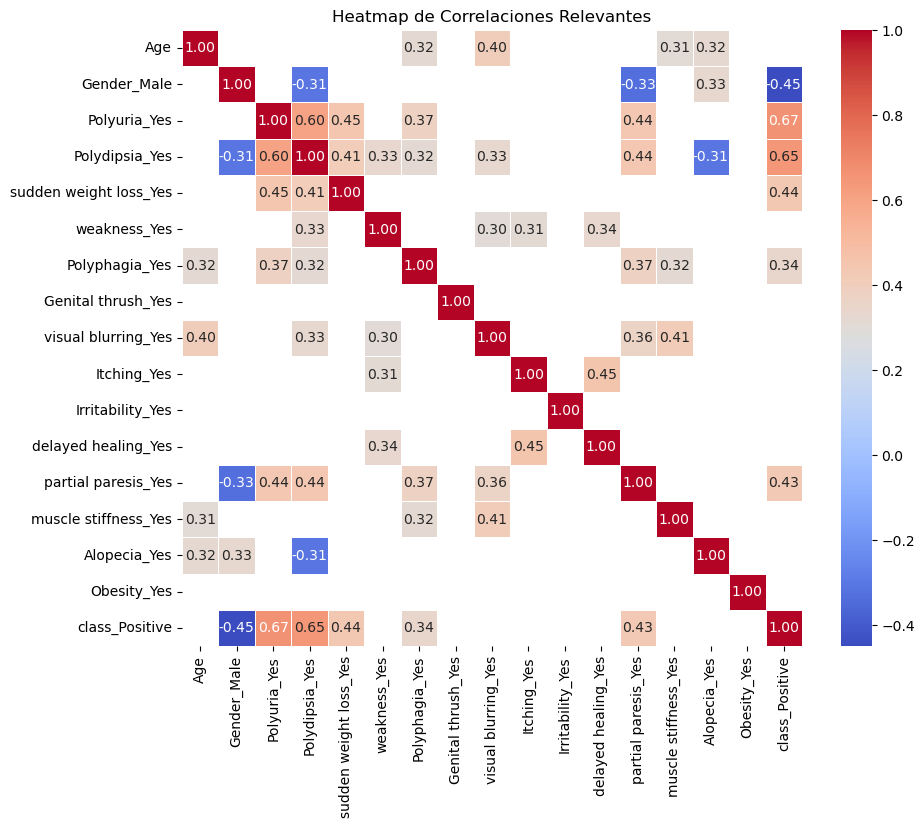

In [15]:
# Filtrar solo las variables con correlación fuerte (>0.3 o <-0.3)
strong_corr = dfcorr[(dfcorr > 0.3) | (dfcorr < -0.3)]

# Crear el heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(strong_corr, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Heatmap de Correlaciones Relevantes")
plt.show()

### Análisis de los resultados
Basándonos en la correlación con "class_Positive", observamos lo siguiente:

Favorecen la diabetes:
Polyuria_Yes (0.67)
Polydipsia_Yes (0.64)
sudden weight loss_Yes (0.43)
partial paresis_Yes (0.43)

Menos probabilidad de diabetes)
Gender_Male (-0.44)
Alopecia_Yes (-0.26)

Los síntomas más importantes para predecir la diabetes en este dataset son: poliuria, polidipsia, pérdida de peso repentina y paresia parcial. 
Además, el género masculino y la alopecia parecen estar menos relacionados con la diabetes.

3️⃣ Preprocesamiento
•	Convertir datos categóricos en numéricos (echo en el apartado anterior).
•	Normalizar variables numéricas para mejorar el rendimiento del modelo.
•	Dividir los datos en entrenamiento y prueba.

Normalizar las variables numéricas
La normalización es importante para asegurar que todas las variables estén en el mismo rango, generalmente de 0 a 1, lo cual mejora el rendimiento de muchos modelos. Para esto, utilizaremos StandardScaler para hacer que todas las variables tengan media 0 y desviación estándar 1.

### Separamos las variables numericas (float64 y int64) para luego normalizarlas con StandardScaler() 

In [16]:
# Separar las variables numéricas (por ejemplo: Age)
variablesnum = df.select_dtypes(include=['float64','int64']).columns

# Normalizar las variables numéricas
scaler = StandardScaler()
df[variablesnum] = scaler.fit_transform(df[variablesnum])

In [17]:
# comprovamos que la media sea 0 y la desviacion standard 1
# Ver las primeras filas para comprobar la normalización
print("Primeras filas después de la normalización:")
print(df.head())

# Verificar la media y desviación estándar de las columnas numéricas normalizadas
print("\nMedia por columna después de la normalización:")
print(df[variablesnum].mean())

print("\nDesviación estándar por columna después de la normalización:")
print(df[variablesnum].std())

Primeras filas después de la normalización:
        Age  Gender_Male  Polyuria_Yes  Polydipsia_Yes  \
0 -0.661367         True         False            True   
1  0.821362         True         False           False   
2 -0.578993         True          True           False   
3 -0.249498         True         False           False   
4  0.986110         True          True            True   

   sudden weight loss_Yes  weakness_Yes  Polyphagia_Yes  Genital thrush_Yes  \
0                   False          True           False               False   
1                   False          True           False               False   
2                   False          True            True               False   
3                    True          True            True                True   
4                    True          True            True               False   

   visual blurring_Yes  Itching_Yes  Irritability_Yes  delayed healing_Yes  \
0                False         True             False 

In [18]:
# Definir las variables indep (X) y la variable obj (y)
X = df.drop(columns=['class_Positive'])
y = df['class_Positive']

# Dividir los datos en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Verificar las dimensiones de los conjuntos resultantes
print(f"Tamaño de los datos de entrenamiento (X_train): {X_train.shape}")
print(f"Tamaño de los datos de prueba (X_test): {X_test.shape}")

Tamaño de los datos de entrenamiento (X_train): (416, 16)
Tamaño de los datos de prueba (X_test): (104, 16)


In [19]:
# Si la probabilidad es mayor a 0.5, el modelo predice 1 (diabetes). 
# Si es menor a 0.5, predice 0 (no diabetes).

# Crear y entrenar el modelo de Regresión Logística
modelodiabetes = LogisticRegression()
modelodiabetes.fit(X_train, y_train)

LogisticRegression()

In [20]:
# Hacer predicciones
y_pred = modelodiabetes.predict(X_test) 

# Crear un DataFrame para comparar valores reales vs. predichos
resultado = pd.DataFrame({'Real': y_test.values, 'Predicho': y_pred})

# Mostrar las primeras 10 filas
print("Comparación de valores reales y predichos:")
print(resultado.head(10))

# Evaluar el modelo con la precisión
accuracy = accuracy_score(y_test, y_pred) 
print(f'Precisión del modelo: {accuracy:.4f}')

Comparación de valores reales y predichos:
    Real  Predicho
0  False     False
1   True      True
2   True      True
3   True      True
4   True      True
5   True      True
6   True      True
7  False     False
8   True      True
9  False     False
Precisión del modelo: 0.9231


Si la precisión (accuracy) es alta (cerca de 1.0 o 100%), el modelo está clasificando bien.
Si es baja (<0.6), puede haber problemas con los datos o el modelo necesita mejoras

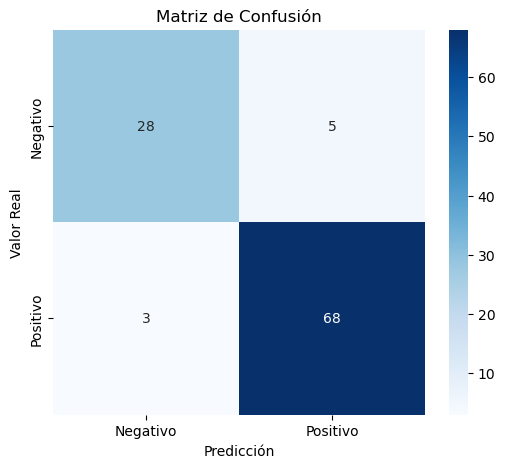

In [21]:
# visualizar predicciones

# Calcular la matriz de confusión
confusionmatriz = confusion_matrix(y_test, y_pred)

# Graficar la matriz de confusión
plt.figure(figsize=(6, 5))
sns.heatmap(confusionmatriz, annot=True, fmt="d", cmap="Blues", xticklabels=["Negativo", "Positivo"], yticklabels=["Negativo", "Positivo"])
plt.xlabel("Predicción")
plt.ylabel("Valor Real")
plt.title("Matriz de Confusión")
plt.show()

### Resultados del modelo
### 28 personas fueron clasificadas correctamente como "No diabéticas".
### 68 personas fueron clasificadas correctamente como "Diabéticas".
### 5 personas fueron clasificadas incorrectamente como diabéticas, pero en realidad no lo eran.
### 3 personas tenían diabetes, pero el modelo no las detectó.